In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns

<h2>1.	Import 311 NYC service request.

In [2]:
Request_df=pd.read_csv('C:\\Users\\subhr\\Desktop\\Simplilearn\\Projects_course1\\311_Service_Requests_from_2010_to_Present.csv',low_memory=False)
Request_df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"


In [3]:
print(Request_df.shape)
Request_df.info()

(300698, 53)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cro

In [4]:
Request_df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
Request_df.drop(columns=['Unique Key','Incident Zip',
       'Incident Address', 'Street Name','Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2','Landmark','Community Board','X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name','School Region','School Number','School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip','School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location','Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name','School Not Found','Agency','Facility Type','Location','Latitude', 'Longitude','Resolution Action Updated Date','Due Date','Resolution Description'],inplace=True)
Request_df.head(2)

,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Address Type,City,Status,Borough
0,12/31/2015 11:59:45 PM,01-01-16 0:55,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,ADDRESS,NEW YORK,Closed,MANHATTAN
1,12/31/2015 11:59:44 PM,01-01-16 1:26,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,ADDRESS,ASTORIA,Closed,QUEENS


In [6]:
Request_df['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', nan, 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [7]:
Request_df['City'] = Request_df['City'].str.upper()

In [8]:
Request_df['Descriptor'].fillna(value='None',inplace=True)
Request_df['Location Type'].fillna(value=Request_df['Location Type'].value_counts().idxmax(),inplace=True)
Request_df['Address Type'].fillna(value=Request_df['Address Type'].value_counts().idxmax(),inplace=True)
Request_df['City'].fillna(value=Request_df['City'].value_counts().idxmax(),inplace=True)

In [9]:
Request_df.isnull().sum()

Created Date         0
Closed Date       2164
Agency Name          0
Complaint Type       0
Descriptor           0
Location Type        0
Address Type         0
City                 0
Status               0
Borough              0
dtype: int64

<h2>2.	Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype 

In [10]:
Request_df['Created Date'] = pd.to_datetime(Request_df['Created Date'],infer_datetime_format=True)
Request_df['Closed Date'] = pd.to_datetime(Request_df['Closed Date'],infer_datetime_format=True)

<h2>3. Create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing

In [11]:
Request_df['Request_Closing_Time']= Request_df['Closed Date']-Request_df['Created Date']
Request_df['Request_Closing_Time(in seconds)'] = Request_df['Request_Closing_Time'].astype('timedelta64[s]')
Request_df['Request_Closing_Time(in hour)'] =Request_df['Request_Closing_Time(in seconds)'].apply(lambda x:x/3600).round(2)

In [12]:
#Creating groups using groupby
Complaint_grp = Request_df.groupby(['Complaint Type']) 
City_grp = Request_df.groupby(['City'])

<h1>4. Insights

<h3> Insight 1:  
     Blocked driveway complaint type took majority share of total resolving time of all complaint type.

<AxesSubplot:xlabel='Request_Closing_Time(in hour)', ylabel='Complaint Type'>

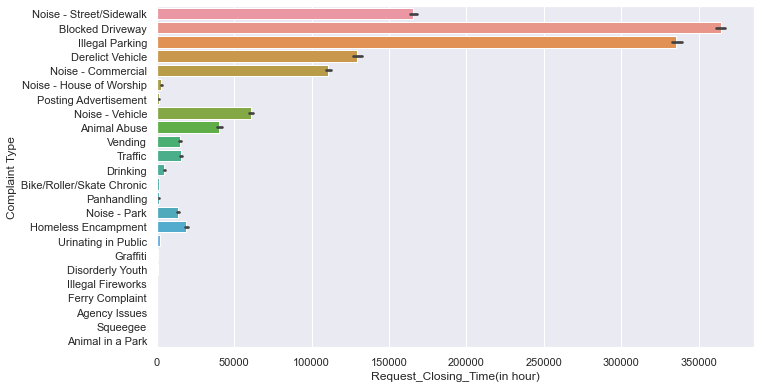

In [13]:
sns.set(rc={'figure.figsize':(10.7,6.27)})
sns.barplot(x=Request_df['Request_Closing_Time(in hour)'],y= Request_df['Complaint Type'],estimator=np.sum)

<h3>Insight 2: Percentage and total count of complaints per city. 
    BROOKLYN has maximum number of complaints

In [14]:
city_comp_count = City_grp['Complaint Type'].count()
city_wise_count_df = pd.DataFrame(data=[city_comp_count.index,city_comp_count])
city_wise_count_df = city_wise_count_df.T
city_wise_count_df.rename(columns={0:'City',1:'Complaint Count'},inplace=True)
city_wise_count_df['Percentage (%)']= city_wise_count_df['Complaint Count'].apply(lambda x: x/len(Request_df)*100).round(2)
city_wise_count_df

,City,Complaint Count,Percentage (%)
0,ARVERNE,220,0.07
1,ASTORIA,7047,2.34
2,BAYSIDE,1221,0.41
3,BELLEROSE,375,0.12
4,BREEZY POINT,30,0.01
5,BRONX,40702,13.54
6,BROOKLYN,100921,33.56
7,CAMBRIA HEIGHTS,477,0.16
8,CENTRAL PARK,97,0.03
9,COLLEGE POINT,1220,0.41


<h3>Insight 3: Total number of noise related complaints

In [15]:
Request_df['Complaint Type'].str.contains('Noise').sum()

106245

<h3>Insight 4: Total closing time in hour for each city.
               Again BROOKLYN leads the table.

<AxesSubplot:xlabel='Request_Closing_Time(in hour)', ylabel='City'>

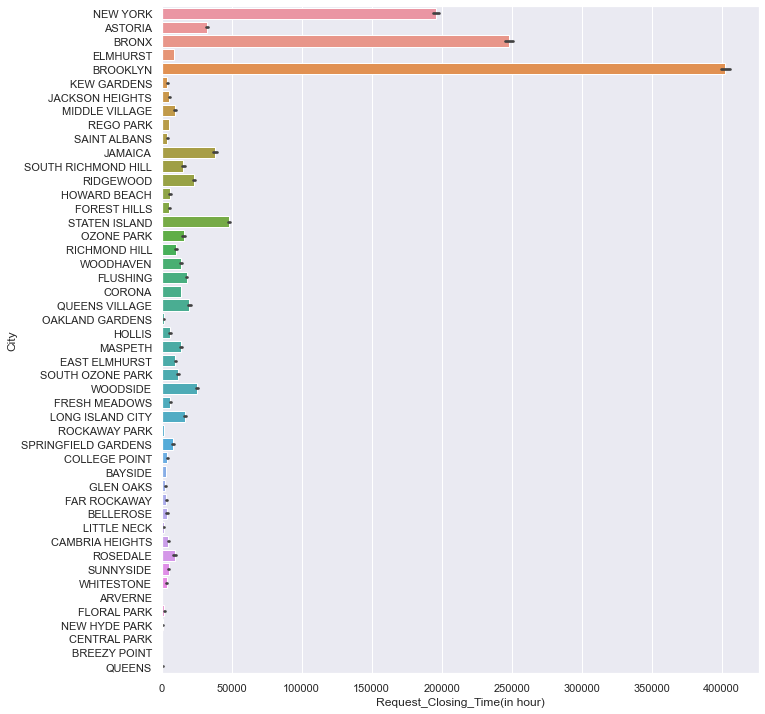

In [16]:
sns.set(rc={'figure.figsize':(10.7,12.27)})
sns.barplot(x=Request_df['Request_Closing_Time(in hour)'],y= Request_df['City'].str.upper(),estimator=np.sum)

<h3>Insight 5: Percentage of "Blocked Driveway" and "Noise" related complaints in each city

In [17]:
Driveway_series=Request_df[Request_df['Complaint Type']=='Blocked Driveway']['City'].str.upper().value_counts().apply(lambda x: (x/len(Request_df[Request_df['Complaint Type']=='Blocked Driveway']))*100).round(2)
Noise_series=Request_df[Request_df['Complaint Type'].str.contains('Noise')]['City'].str.upper().value_counts().apply(lambda x: (x/len(Request_df[Request_df['Complaint Type'].str.contains('Noise')]))*100).round(2)
complaint_per_city_df=pd.DataFrame(data=[Driveway_series,Noise_series],index=['Blocked driveway (%)','Noise complaint (%)'])
complaint_per_city_df=complaint_per_city_df.T
complaint_per_city_df

,Blocked driveway (%),Noise complaint (%)
BROOKLYN,36.90,31.02
BRONX,16.56,14.45
JAMAICA,3.66,1.06
FLUSHING,3.63,0.56
CORONA,3.58,0.58
ASTORIA,3.55,2.20
STATEN ISLAND,2.78,1.82
NEW YORK,2.69,39.41
RIDGEWOOD,2.20,1.01
WOODSIDE,2.11,0.58


<AxesSubplot:xlabel='Count', ylabel='City'>

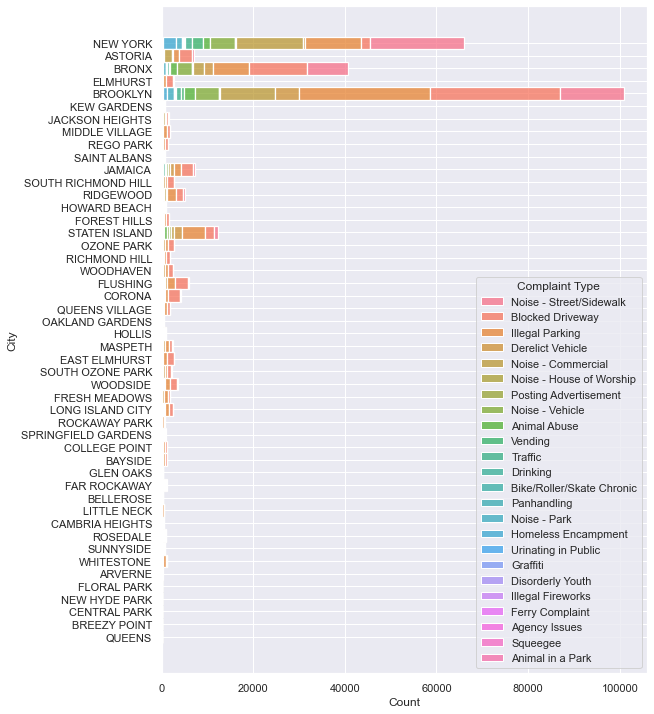

In [18]:
sns.set(rc={'figure.figsize':(8.7,12.27)})
sns.histplot(y=Request_df['City'].str.upper(),hue=Request_df['Complaint Type'],multiple='stack')

<h3> Insight 6 : Outlier analysis | Percentage of closing time that is outlier for each complaint type

In [19]:
import scipy.stats as stats

IQR = stats.iqr(Request_df['Request_Closing_Time(in hour)'],nan_policy='omit').round(2)
print(f'IQR : {IQR}\n')
qr1 = stats.scoreatpercentile(Request_df['Request_Closing_Time(in hour)'],25)
qr3 = stats.scoreatpercentile(Request_df['Request_Closing_Time(in hour)'],75)
Manual_iqr = qr3-qr1
print(f'25th percentile : {qr1}\n75th percentile : {qr3}')
print(f'\nManual IQR : {Manual_iqr:.2f}')
outlier = (qr3+(1.5*Manual_iqr)).round(2)
print(f'\noutlier:{outlier}')
outlier_percentage = (len(Request_df[Request_df['Request_Closing_Time(in hour)']>outlier]['Request_Closing_Time(in hour)'])/len(Request_df))*100
print(f'\npercentage of resolution time that is outlier : {outlier_percentage:.2f} %')

IQR : 4.07

25th percentile : 1.28
75th percentile : 5.43

Manual IQR : 4.15

outlier:11.66

percentage of resolution time that is outlier : 6.14 %


<AxesSubplot:xlabel='Probability', ylabel='Complaint Type'>

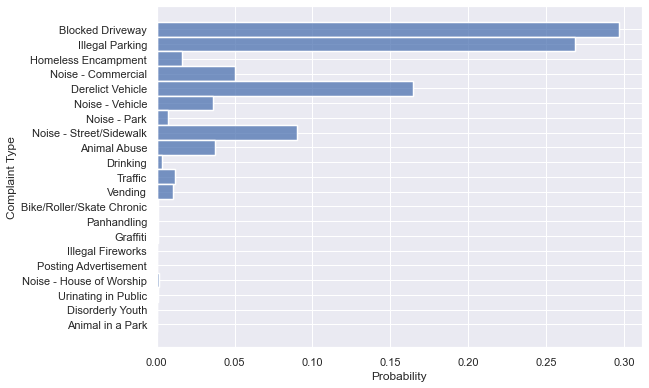

In [20]:
sns.set(rc={'figure.figsize':(8.7,6.27)})
sns.histplot(y=Request_df[Request_df['Request_Closing_Time(in hour)']>outlier]['Complaint Type'],stat='probability')

<h3>5. Complaint types based on the average ‘Request_Closing_Time’, grouping them for different location types.

In [21]:
Location_complaint_grp= Request_df.groupby(['Location Type','Complaint Type'])
Location_complaint_grp['Request_Closing_Time(in hour)'].agg(['mean']).round(2)

mean
Location Type       Complaint Type           
Bridge              Homeless Encampment  3.82
Club/Bar/Restaurant Drinking             4.55
                    Noise - Commercial   3.06
                    Urinating in Public  7.92
Commercial          Animal Abuse         5.34
...                                       ...
Street/Sidewalk     Vending              4.03
Subway Station      Animal Abuse         3.04
                    Urinating in Public  1.15
Terminal            Ferry Complaint       NaN
Vacant Lot          Derelict Vehicle     7.47

[75 rows x 1 columns]

<h3>6. Complaint types based on the average ‘Request_Closing_Time’, grouping them for different location.

In [22]:
city_complaint_grp = Request_df.groupby(['City','Complaint Type'])
city_complaint_grp['Request_Closing_Time(in hour)'].agg(['mean']).round(2)

mean
City     Complaint Type               
ARVERNE  Animal Abuse             2.15
         Blocked Driveway         2.53
         Derelict Vehicle         2.97
         Disorderly Youth         3.60
         Drinking                 0.24
...                                ...
WOODSIDE Noise - Street/Sidewalk  6.56
         Noise - Vehicle          5.48
         Traffic                  4.84
         Urinating in Public      6.42
         Vending                  7.30

[748 rows x 1 columns]

<h2>7. Statistical Testing
<h3> 7 a. Null Hypothesis(h0): Average response time across complaint type is similar</h3>
<h3>Alternative Hypothesis(ha): Average response time across complaint type is not similar </h3>

In [23]:
mean_ser = Complaint_grp['Request_Closing_Time(in hour)'].mean().round(2)
mean_ser

Complaint Type
Agency Issues                  5.26
Animal Abuse                   5.21
Animal in a Park             336.83
Bike/Roller/Skate Chronic      3.77
Blocked Driveway               4.74
Derelict Vehicle               7.36
Disorderly Youth               3.56
Drinking                       3.86
Ferry Complaint                 NaN
Graffiti                       7.15
Homeless Encampment            4.37
Illegal Fireworks              2.76
Illegal Parking                4.50
Noise - Commercial             3.15
Noise - House of Worship       3.19
Noise - Park                   3.41
Noise - Street/Sidewalk        3.45
Noise - Vehicle                3.59
Panhandling                    4.37
Posting Advertisement          1.98
Squeegee                       4.05
Traffic                        3.45
Urinating in Public            3.63
Vending                        4.01
Name: Request_Closing_Time(in hour), dtype: float64

In [24]:
z_score = stats.zscore(mean_ser,nan_policy='omit').round(3)
z_score

array([-0.196, -0.197,  4.69 , -0.218, -0.204, -0.166, -0.222, -0.217,
          nan, -0.169, -0.21 , -0.233, -0.208, -0.228, -0.227, -0.224,
       -0.223, -0.221, -0.21 , -0.245, -0.214, -0.223, -0.221, -0.215])

<h3> Let's take three random 'z_score' values and find the 'p_values' for them. Let's take the "significance level(alpha)=0.05"

In [25]:
P_value_1 = stats.norm.sf(abs(z_score[2]))
P_value_2 = stats.norm.sf(abs(z_score[11]))
P_value_3 = stats.norm.sf(abs(z_score[22]))

print(f'p-value for z-score {z_score[2]} is : {P_value_1:.7f}\np-value for z-score {z_score[11]} is : {P_value_2:.4f}\np-value for z-score {z_score[22]} is : {P_value_3:.4f}')

p-value for z-score 4.69 is : 0.0000014
p-value for z-score -0.233 is : 0.4079
p-value for z-score -0.221 is : 0.4125


<h3>Conclusion : As we can see that "p-value" for any random "z-score" is greater than the "significance level(alpha)" except the one at 3rd index i.e "z_score[2]" in z_score list which is less than "significance level(alpha)" , we "Reject" the null hypothesis

<h3><b> 7 b. Relation between Complaint Type & Location</h3>
    
<h3>Null Hypthesis(h0): Complaint type and Location are independent
<h3>Alternative Hypothesis(ha): Complaint type and location are not independent

In [26]:
Request_df['City'] = Request_df['City'].str.upper()
Contingency_tab = pd.crosstab(Request_df['Complaint Type'],Request_df['City'])
Contingency_tab

City,ARVERNE,ASTORIA,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,COLLEGE POINT,...,ROSEDALE,SAINT ALBANS,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,WHITESTONE,WOODHAVEN,WOODSIDE
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Agency Issues,0,0,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Animal Abuse,38,125,37,7,2,1415,2405,11,0,28,...,33,30,55,26,24,557,35,28,45,69
Animal in a Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,15,0,1,0,20,116,0,0,0,...,2,0,1,1,0,7,2,4,2,4
Blocked Driveway,35,2734,377,95,3,12755,28431,147,0,435,...,211,244,942,1548,262,2142,206,208,1060,1624
Derelict Vehicle,27,363,198,89,3,1953,5352,115,0,184,...,208,202,358,289,210,1766,10,227,308,249
Disorderly Youth,2,3,1,2,0,63,72,0,0,1,...,0,1,2,2,0,23,2,1,0,1
Drinking,1,35,1,1,1,188,265,0,0,0,...,2,3,13,23,6,175,10,2,3,15
Ferry Complaint,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
Chi_val,p_val,dof,exp_val=stats.chi2_contingency(Contingency_tab)
print(f'Chi-square Value: {Chi_val}\nP-value: {p_val}\nDegree of Freedom: {dof}\nExpected Value: {exp_val}')

Chi-square Value: 119358.22485045934
P-value: 0.0
Degree of Freedom: 1081
Expected Value: [[4.38978643e-03 1.40612841e-01 2.43633147e-02 ... 2.19090250e-02
  4.91656080e-02 7.31098976e-02]
 [5.69062648e+00 1.82281113e+02 3.15829769e+01 ... 2.84013994e+01
  6.37350165e+01 9.47747973e+01]
 [7.31631072e-04 2.34354735e-02 4.06055245e-03 ... 3.65150417e-03
  8.19426800e-03 1.21849829e-02]
 ...
 [3.29087656e+00 1.05412760e+02 1.82643649e+01 ... 1.64244657e+01
  3.68578175e+01 5.48080533e+01]
 [4.33125594e-01 1.38738003e+01 2.40384705e+00 ... 2.16169047e+00
  4.85100666e+00 7.21350990e+00]
 [2.78166133e+00 8.91016701e+01 1.54382204e+01 ... 1.38830188e+01
  3.11546069e+01 4.63273051e+01]]


<h3>Conclusion : Reject Null Hypothesis